<a href="https://colab.research.google.com/github/doudi25/Mnist-Classification-with-pytorch/blob/main/Mnist_classification_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torchvision import datasets, transforms
train_data=datasets.MNIST(root='data',train=True,download=True,transform=transforms.ToTensor())
test_data=datasets.MNIST(root='data',train=False,download=True,transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:04<00:00, 2069282.38it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 401002.69it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3592713.78it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 821001.93it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [5]:
import torch
from torch.utils.data import DataLoader
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)


In [4]:
from sklearn.model_selection import train_test_split
test_data,val_data=train_test_split(test_data,test_size=0.4)

In [6]:
import torch.nn as nn
import torch.nn.functional as F
class DeepConv(torch.nn.Module):
    def __init__(self):
        super(DeepConv, self).__init__()
        self.conv1=nn.Conv2d(1,28,3)
        self.pool1=nn.MaxPool2d(2)
        self.conv2=nn.Conv2d(28,7,3)
        self.pool2=nn.MaxPool2d(2)
        self.flatten=nn.Flatten()

        self.affine=nn.Linear(7*5*5,10)
    def forward(self,x):
      x = self.conv1(x)
      x=F.gelu(x)
      x = self.pool1(x)
      x = self.conv2(x)
      x=F.gelu(x)
      x = self.pool2(x)
      x = self.flatten(x)
      x = self.affine(x)
      return F.softmax(x,dim=1)
    def fit(self,data_loader,val_loader,epochs):
      criterion=nn.CrossEntropyLoss()
      optim=torch.optim.AdamW(self.parameters(),lr=0.001)
      self.train()
      for epoch in range(epochs+1):
        for x,y in data_loader:
          optim.zero_grad()
          out=self.forward(x)
          loss=criterion(out,y)
          loss.backward()
          optim.step()
        if epoch%10==0:
             val_loss, val_accuracy = self.evaluate(val_loader)
             print(f'Epoch: {epoch}, Loss: {loss}, Val Loss: {val_loss}, Val Accuracy: {val_accuracy}')

    @torch.no_grad()
    def evaluate(self,test_loader):
      self.eval()
      for x,y in test_loader:
        out=self.forward(x)
        loss=F.cross_entropy(out,y)
        accuracy=self.accuracy(out,y)
      return loss,accuracy
    def predict(self,x):
      self.eval()
      out=self.forward(x)
      return torch.argmax(out,dim=1)
    def accuracy(self,out,y):
      return  torch.sum(out.argmax(dim=1)==y)/len(y)

In [7]:
model=DeepConv()
model.fit(train_loader,test_loader,30)

Epoch: 0, Loss: 1.4736628532409668, Val Loss: 1.5269933938980103, Val Accuracy: 0.9375
Epoch: 10, Loss: 1.4612497091293335, Val Loss: 1.4612520933151245, Val Accuracy: 1.0


KeyboardInterrupt: 

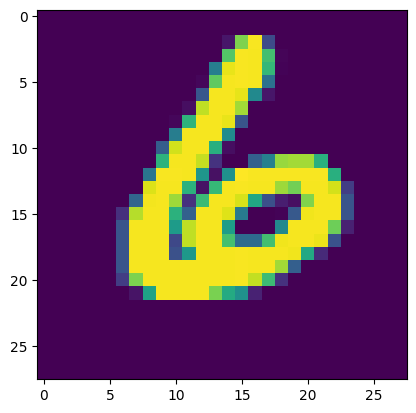

tensor([6])


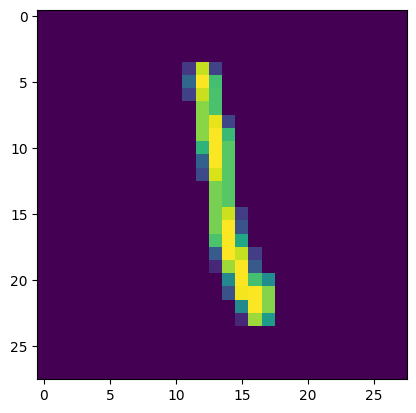

tensor([1])


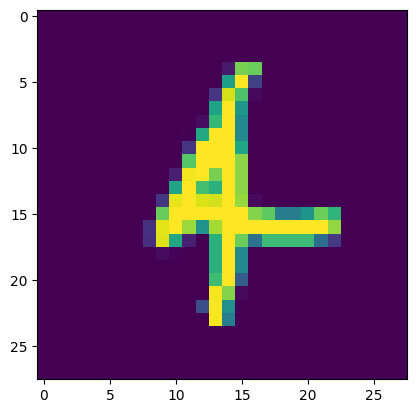

tensor([4])


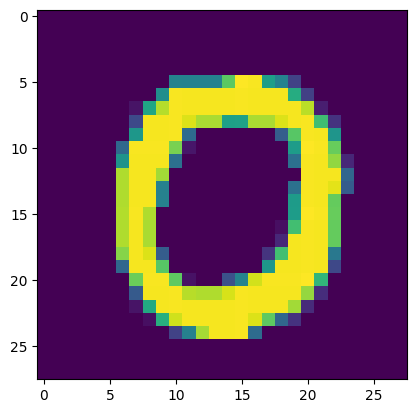

tensor([0])


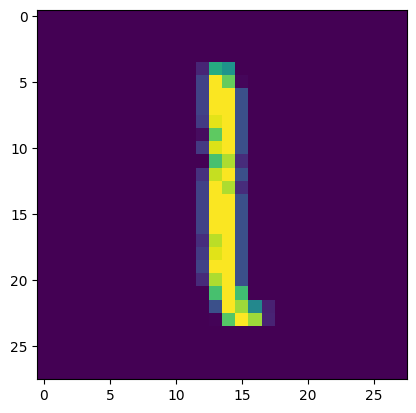

tensor([1])


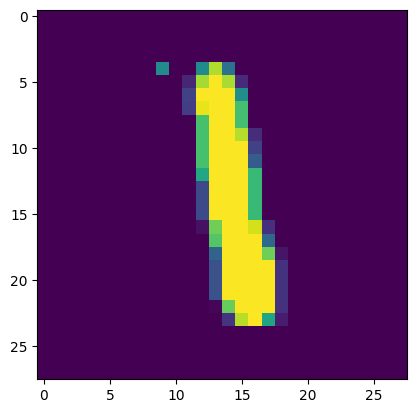

tensor([1])


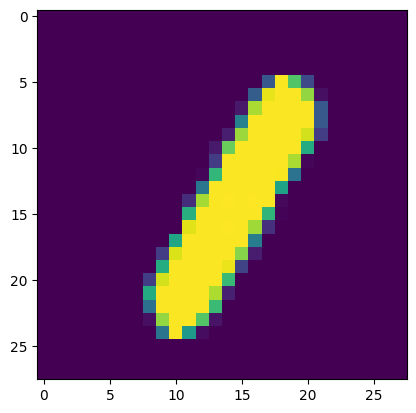

tensor([1])


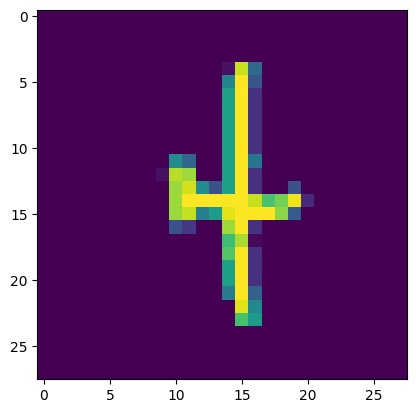

tensor([4])


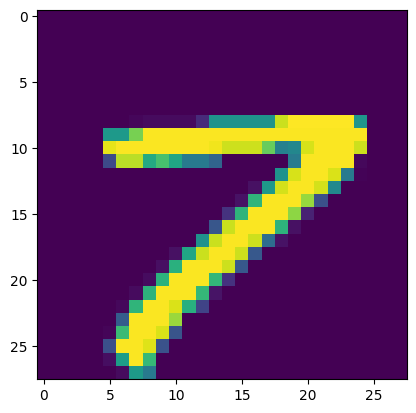

tensor([7])


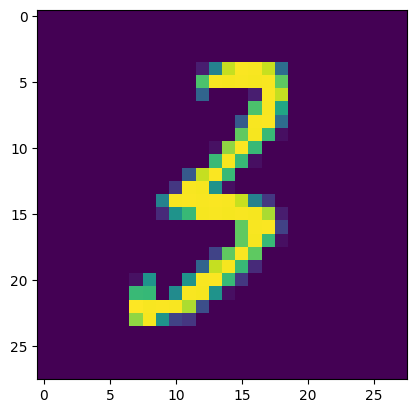

tensor([3])


In [15]:
#let's test the model
import matplotlib.pyplot as plt
for i in range(10):
  plt.imshow(val_data[i][0].reshape(28,28))
  plt.show()
  print(model.predict(val_data[i][0].reshape(1,1,28,28)))